En primer lugar cargamos el archivo y hacemos una estadística básica de las variables.

Este script se ha generado en Colaboratory, puede modificarse para correr directamente como Jupyter notebook

In [0]:
#from google.colab import files
#uploaded = files.upload()  # escoger el archivo que queremos utilizar, en este caso ejemploMI.csv que tiene los datos
import pandas as pd
df = pd.read_csv('ejemploMI.csv')

In [2]:
df.tail()  # verificamos que se ha cargado correctamente

,Unnamed: 0,X,exitus,apache2,tipopaciente,sexopac,edad,sofa,lactato
1360,1364,1364,0,24,QU,Hombre,68,5,1.9
1361,1365,1365,0,18,QP,Hombre,55,5,1.5
1362,1366,1366,0,13,QP,Hombre,68,2,4.9
1363,1367,1367,0,10,QU,Hombre,33,1,1.1
1364,1368,1368,0,8,QP,Hombre,64,4,4.8


Hacemos estadistica basica de las variables

In [3]:
df.describe()

,Unnamed: 0,X,exitus,apache2,edad,sofa,lactato
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000
mean,684.740659,684.740659,0.063736,16.082051,63.414652,3.802930,2.160293
std,394.620098,394.620098,0.244372,7.997012,15.952075,3.000976,2.197511
min,1.000000,1.000000,0.000000,1.000000,12.000000,0.000000,0.400000
25%,344.000000,344.000000,0.000000,10.000000,54.000000,1.000000,1.000000
50%,685.000000,685.000000,0.000000,14.000000,67.000000,3.000000,1.500000
75%,1026.000000,1026.000000,0.000000,20.000000,75.000000,6.000000,2.500000
max,1368.000000,1368.000000,1.000000,50.000000,102.000000,16.000000,26.400000


In [4]:
pd.crosstab(index=df["sexopac"],columns="pacientes")      

col_0,pacientes
sexopac,
Hombre,851
Mujer,514


In [5]:
print("Mortalidad en el grupo: ",df['exitus'].mean()*100,"%")
pd.crosstab(index=df["exitus"],columns="pacientes") 

Mortalidad en el grupo:  6.373626373626373 %


col_0,pacientes
exitus,
0,1278
1,87


La mortalidad en el grupo completo es del 6.4%. Esto significa que si predecimos a todos como vivos conseguiremos una tasa de aciertos del 93.6%. Esto es lo que tenemos que mejorar con nuestras predicciones.

In [6]:
print(pd.crosstab(index=df["tipopaciente"],columns="pacientes"))     # medico, politrauma,quirurg programado y quirurg urgente

#La mortalidad es diferente segun los grupos
df.groupby('tipopaciente').mean()

col_0         pacientes
tipopaciente           
M                   394
PT                   60
QP                  726
QU                  185


,Unnamed: 0,X,exitus,apache2,edad,sofa,lactato
tipopaciente,,,,,,,
M,683.385787,683.385787,0.154822,20.791878,61.847716,4.436548,2.957107
PT,585.583333,585.583333,0.066667,14.100000,42.483333,3.683333,2.113333
QP,687.528926,687.528926,0.013774,13.331956,65.469697,3.165289,1.738705
QU,708.843243,708.843243,0.064865,17.486486,65.475676,4.994595,2.132973


Como ejemplo grafico mostramos la distribucion de la variable edad y la variable lactato

El valor más frecuente de edad es  77


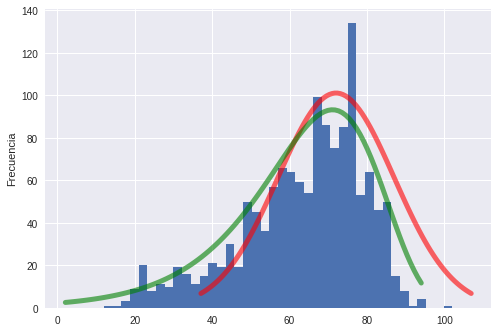

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.hist(df["edad"], bins=40)
plt.ylabel('Frecuencia')


#Dibujamos una distribucion normal y una de gumbel para comparar con el histograma
from scipy.stats import norm
from scipy.stats import gumbel_r
#fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01,loc=72,scale=15),norm.ppf(0.99,loc=72,scale=15), 100)
plt.plot(x,np.flip(3800*norm.pdf(x,loc=72,scale=15),0),'r-', lw=5, alpha=0.6)

x = np.linspace(gumbel_r.ppf(0.01,loc=25,scale=15),gumbel_r.ppf(0.99,loc=25,scale=15), 100)
plt.plot(x,np.flip(3800*gumbel_r.pdf(x,loc=25,scale=15),0),'r-', lw=5, alpha=0.6,c='green')

print('El valor más frecuente de edad es ',df['edad'].mode().values[0])

plt.show()

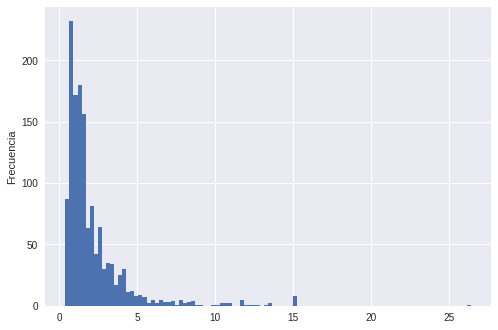

In [8]:
plt.hist(df["lactato"],bins=100)
plt.ylabel('Frecuencia')
plt.show()

Lactato máximo 15.0


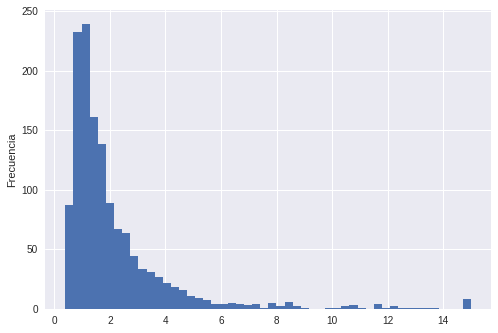

In [9]:
#Vemos que hay un valor de lactato que se sale de la capacidad de medición del gasómetro (hasta 15). Lo eliminamos ya que es un único valor
df=df[df['lactato']<=15]
print('Lactato máximo',df['lactato'].max())


plt.hist(df["lactato"],bins=50)
plt.ylabel('Frecuencia')
plt.show()

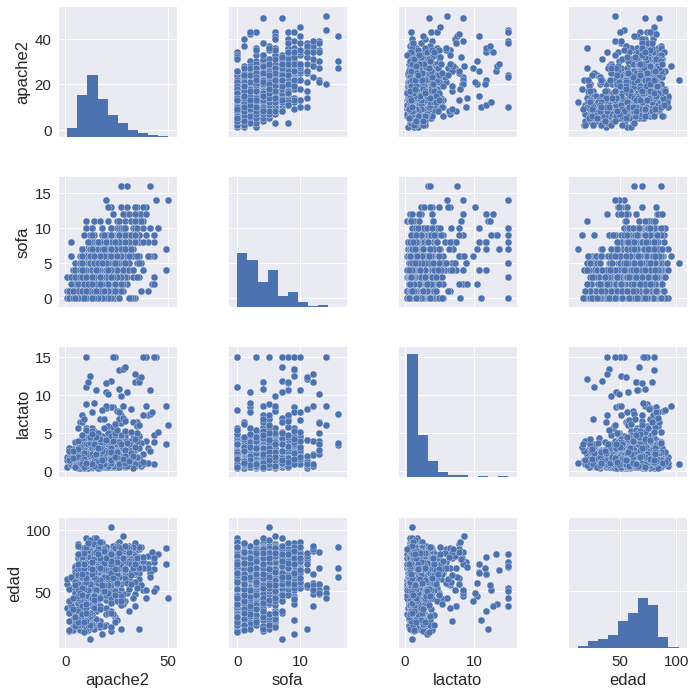

In [12]:
#Ahora estudiamos la correlacion entre las variables numericas predictoras
#mediante pairplots y heatmaps

import seaborn as sns
cols=['apache2','sofa','lactato','edad']
sns.pairplot(df[cols],size=2.5)
plt.tight_layout()
plt.show()

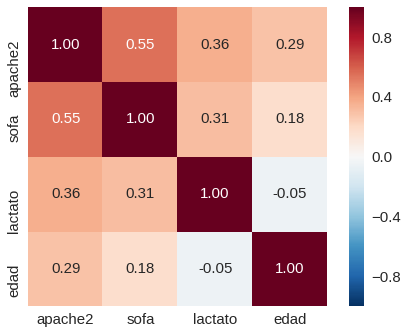

In [11]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,
           cbar=True,
           annot=True,
           square=True,
           fmt='.2f',
           annot_kws={'size':15},
           yticklabels=cols,
           xticklabels=cols)
plt.show()